In [1]:
import os

import numpy as np
import wave
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['font.family'] = 'simhei'

In [2]:
themass_path = './img/icos/the_mass.wav'

In [ ]:
wav_file = wave.open(themass_path,'r')
numchannel = wav_file.getnchannels()          # 声道数
samplewidth = wav_file.getsampwidth()      # 量化位数
framerate = wav_file.getframerate()        # 采样频率
numframes = wav_file.getnframes()           # 采样点数
print("channel", numchannel)
print("sample_width", samplewidth)
print("framerate", framerate)
print("numframes", numframes)
Wav_Data = wav_file.readframes(numframes-240000)
Wav_Data = np.fromstring(Wav_Data,dtype=np.int16)
Wav_Data = Wav_Data*1.0/(max(abs(Wav_Data)))        #对数据进行归一化

video_framerate = 24

Time = np.linspace(0,len(Wav_Data)/framerate*1.0,num=len(Wav_Data))
Wav_Data_2 = Wav_Data.copy()
Wav_Data_2[Wav_Data>0.5] = 1
Wav_Data_2[Wav_Data<0.5] = 0
video_change = np.zeros(len(Wav_Data_2)*video_framerate//framerate+1)
for i in range(framerate//video_framerate,len(Wav_Data_2),framerate//video_framerate):
    if np.max(Wav_Data_2[i-framerate//video_framerate:i]) > 0.5:
        video_change[i*video_framerate//framerate] = 1

flen = 10
for i in range(flen,len(video_change)):
    if 1 == video_change[i]:
        for j in range(i-flen,i):
            if 1 == video_change[j]:
                for k in range(j,i):
                    video_change[k] = 1
                break
last_cnt = 10
for i in range(flen,len(video_change)):
    if 1 == video_change[i]:
        for j in range(i-flen,i):
            if 1 == video_change[j]:
                for k in range(j,i):
                    video_change[k] = 1
                break

Time2 = np.linspace(0,len(video_change)/video_framerate*1.0,num=len(video_change))
print(len(Time2))
plt.figure(1)
plt.plot(Time,Wav_Data)
plt.grid(True)
plt.show()
plt.figure(2)
plt.plot(Time2[200:800],video_change[200:800])
plt.grid(True)
plt.figure(2)
plt.show()
# Pxx, freqs, bins, im = plt.specgram(Wav_Data,NFFT=1024,Fs = 16000,noverlap=900)
# plt.show()
# print(Pxx)
# print(freqs)
# print(bins)
# print(im)

In [13]:
wav_file = wave.open(themass_path,"r")
# getparams() 一次性返回所有的WAV文件的格式信息
params = f.getparams()
# nframes 采样点数目
numchannel = wav_file.getnchannels()          # 声道数
samplewidth = wav_file.getsampwidth()      # 量化位数
framerate = wav_file.getframerate()        # 采样频率
numframes = wav_file.getnframes()           # 采样点数

Wav_Data = wav_file.readframes(numframes-240000)
Wav_Data = np.fromstring(Wav_Data,dtype=np.int16)
wave_data = Wav_Data*1.0/(max(abs(Wav_Data)))        #对数据进行归一化
# readframes() 按照采样点读取数据
str_data = wav_file.readframes(nframes)            # str_data 是二进制字符串

# # 以上可以直接写成 str_data = f.readframes(f.getnframes())

# # 转成二字节数组形式（每个采样点占两个字节）
# wave_data = np.fromstring(str_data, dtype = np.short)
print( "采样点数目：" + str(len(wave_data)))          #输出应为采样点数目
wav_file.close()


/home/zhiwei/miniconda3/envs/dslen/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


采样点数目：19064928


In [108]:
# 计算每一帧的能量 framerate//video_framerate 个采样点为一帧

def calEnergy(wave_data, framerate, video_framerate) :
    energy = []
    sum = 0
    for i in range(len(wave_data)) :
        sum = sum + (wave_data[i] * wave_data[i])
        if (i + 1) % framerate//video_framerate == 0 :
            energy.append(sum)
            sum = 0
        elif i == len(wave_data) - 1 :
            energy.append(sum)
    return np.array(energy)

In [126]:
video_framerate = 24
energy = calEnergy(wave_data, framerate, video_framerate)
energy = np.gradient(energy)
energy[energy<0] = 0

vf = 128
print(vf)

for e in range(vf, len(energy), vf):
    emax = np.max(energy[e-vf:e])
    energy[e-vf:e] /= emax
    
energy[-vf:] = 0
energy[energy>0.4] = 1
energy[energy<=0.4] = 0

energy = np.gradient(energy)*2
energy[energy<0] = 0

128


10392
405


<Figure size 432x288 with 0 Axes>

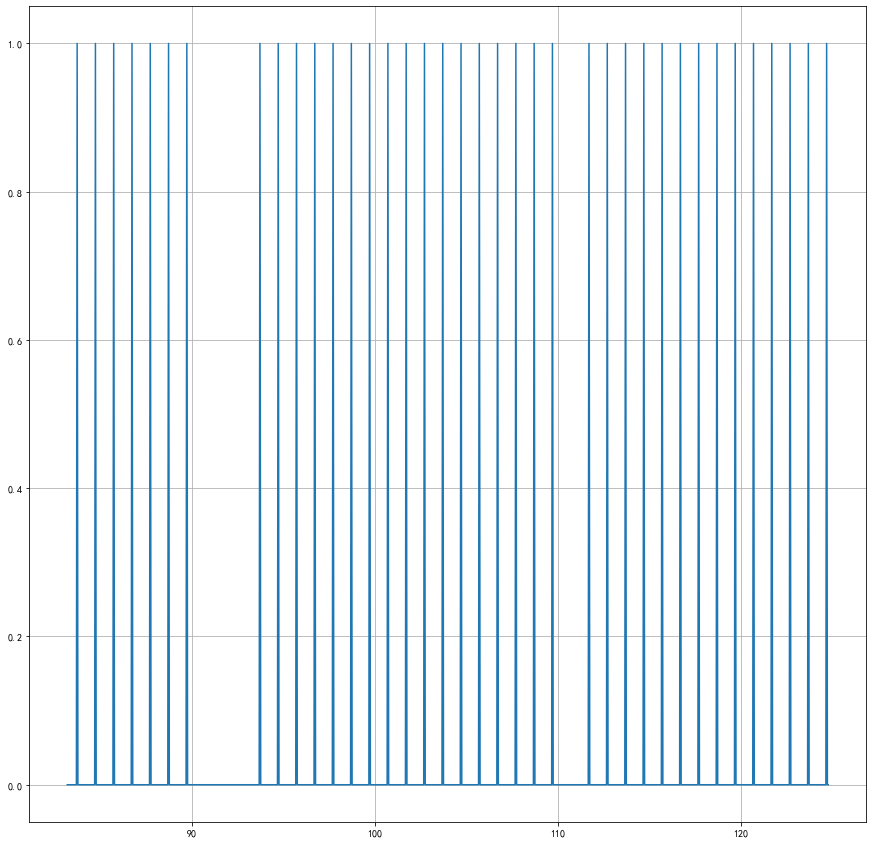

In [127]:
# Time = np.linspace(0,len(wave_data)/framerate*1.0,num=len(wave_data))
# plt.figure(1)
# plt.figure(figsize=(15,15)) 
# plt.plot(Time,wave_data)
# plt.grid(True)
# plt.show()
Time = np.linspace(0,len(wave_data)/framerate*1.0, num=len(energy))
print(len(energy))
print(len(energy[energy>0.5]))
plt.figure(2)
plt.figure(figsize=(15,15)) 
plt.plot(Time[2000:3000],energy[2000:3000])
plt.grid(True)
plt.show()